In [2]:
import numpy as np;
import pandas as pd;
from matplotlib import pyplot as plt;

df2 = pd.read_csv(r"C:\Users\Raider\Downloads\lda.csv");
df2

,X1,X2,y
0,1.972824,0.845520,1
1,1.073404,0.764249,1
2,2.316878,2.004126,1
3,2.550982,1.487281,1
4,-0.472917,0.699755,1
...,...,...,...
595,4.943688,3.134134,0
596,4.337335,2.895903,0
597,3.365212,2.376120,0
598,0.078264,1.300104,0


In [3]:
X = df2.drop(['y'], axis = 1)
Y = df2.y

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
model = LinearDiscriminantAnalysis();
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
print("Predicted values: ", y_pred)
print("Probability of class 1 being predicted: ", y_prob)
print("True positivity rate(sensitivity): ", model.score(x_test, y_test))

Predicted values:  [0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1]
Probability of class 1 being predicted:  [0.15397544 0.85220788 0.883005   0.06733308 0.72017575 0.1356184
 0.00957335 0.38689098 0.01229683 0.53447634 0.15350727 0.6181526
 0.72291576 0.49421726 0.41056084 0.08157793 0.00882112 0.4402198
 0.8950124  0.73697958 0.03627838 0.01650524 0.06185808 0.71973126
 0.0681993  0.74470641 0.84478135 0.89233645 0.35614113 0.25941914
 0.06093301 0.35106834 0.13192746 0.23126856 0.86876107 0.2794037
 0.24595401 0.85012912 0.86029418 0.8912644  0.13163206 0.18535939
 0.22851311 0.9174972  0.96518427 0.82829431 0.07203738 0.99548067
 0.25570266 0.44446484 0.90970933 0.936617

In [4]:
y_pred_7 = np.where(y_prob>0.7, 1, 0)
y_pred_2 = np.where(y_prob>0.2, 1, 0)
print("Predicted values for class 1 in case threshold for class 1 was 0.7 instead of 0.5 ", y_pred_7)
print("Predicted values for class 1 in case threshold for class 1 was 0.2 instead of 0.5 ", y_pred_2)

Predicted values for class 1 in case threshold for class 1 was 0.7 instead of 0.5  [0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1]
Predicted values for class 1 in case threshold for class 1 was 0.2 instead of 0.5  [0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1]


Comfusion matrix in case threshold for class1 is 0.5 [[80 15]
 [19 66]]
Comfusion matrix in case threshold for class1 is 0.7 [[86  9]
 [35 50]]
Comfusion matrix in case threshold for class1 is 0.2 [[53 42]
 [ 2 83]]


Text(0.5, 1.0, 'LDA with threshold 0.2')

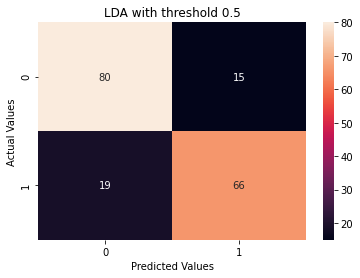

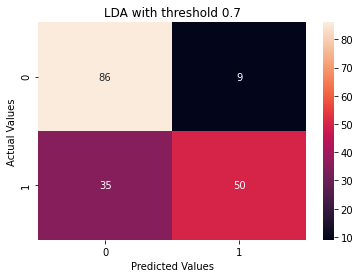

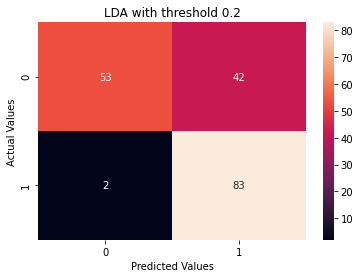

In [6]:
import seaborn as sn

cm_5 = metrics.confusion_matrix(y_test, y_pred)
cm_7 = metrics.confusion_matrix(y_test, y_pred_7)
cm_2 = metrics.confusion_matrix(y_test, y_pred_2)
print("Comfusion matrix in case threshold for class1 is 0.5", cm_5)
print("Comfusion matrix in case threshold for class1 is 0.7", cm_7)
print("Comfusion matrix in case threshold for class1 is 0.2", cm_2)
plt.figure(1)
sn.heatmap(cm_5, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('LDA with threshold 0.5')
plt.figure(2)
sn.heatmap(cm_7, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('LDA with threshold 0.7')
plt.figure(3)
sn.heatmap(cm_2, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('LDA with threshold 0.2')